In [6]:
import numpy as np

In [7]:
data = np.load('./clipped_data/mdd_control.npy')

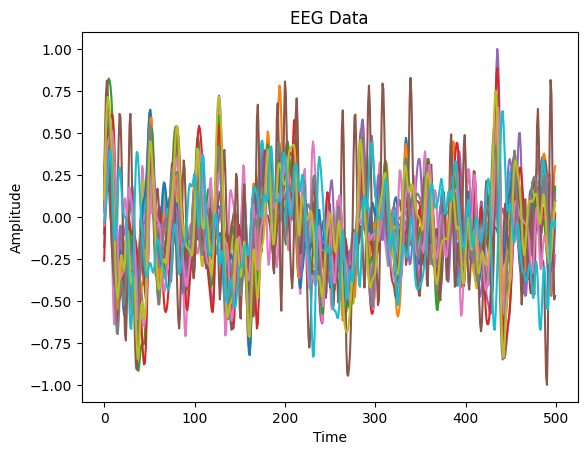

In [8]:
import matplotlib.pyplot as plt
from random import randint

eeg_data = data[100]


# Assuming your EEG data is in a 2D array format where each row is a separate EEG channel
for channel_data in eeg_data:
    plt.plot(channel_data)  # Plot each channel

plt.title('EEG Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()


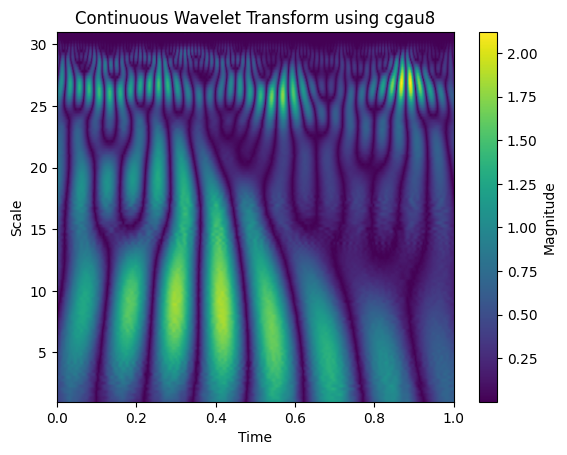

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from random import randint
# Example signal: A sine wave with frequency modulation
time = np.linspace(0, 1, 500, endpoint=False)
# signal_data = np.sin(2 * np.pi * 7 * time) + np.sin(2 * np.pi * 13 * time)

# Define scales for the CWT
scales = np.arange(1, 128)

# Perform the CWT using PyWavelets and the 'cgau8' wavelet
coefficients, frequencies = pywt.cwt(eeg_data[randint(0, 20)], scales, 'morl')

# Plot the CWT result
plt.imshow(np.abs(coefficients), extent=[0, 1, 1, 31], cmap='viridis', aspect='auto')
plt.colorbar(label='Magnitude')
plt.title('Continuous Wavelet Transform using cgau8')
plt.xlabel('Time')
plt.ylabel('Scale')
plt.show()



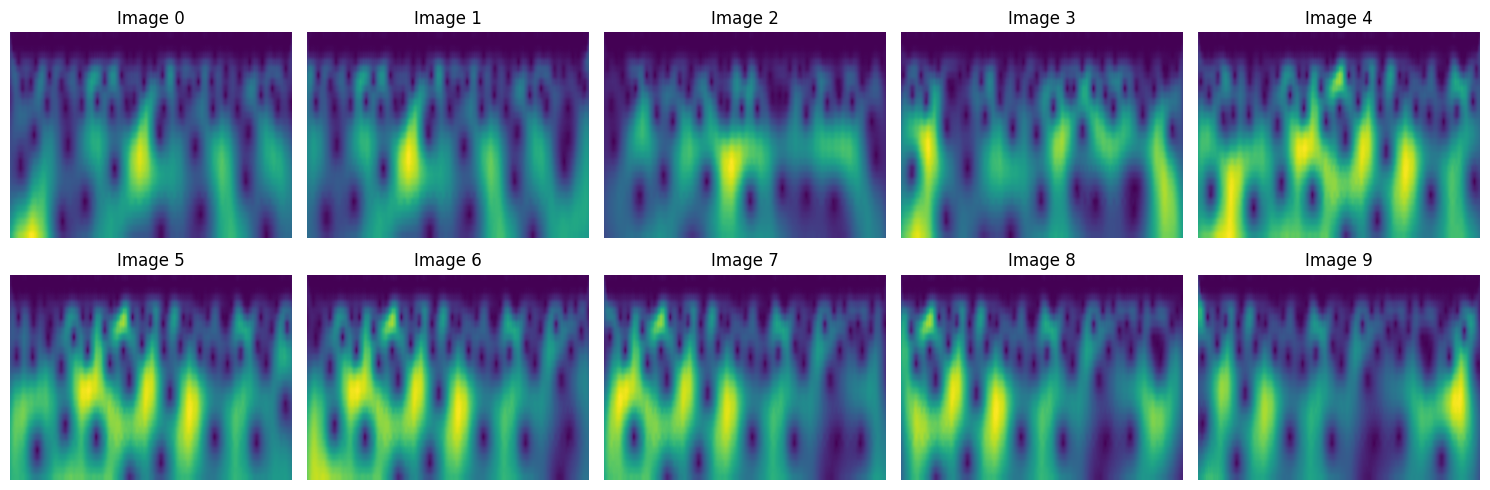

In [14]:
import os
def load_cwt_image(npz_file_path, channel_index=0):
    """Load a single CWT image slice for a specified EEG channel from an .npz file."""
    with np.load(npz_file_path) as data:
        image = data['image'][:, :]  # Select the specified EEG channel
    return image

def display_cwt_images(folder_path, num_images=10, channel_index=0):
    """Display a specified number of CWT images from a folder, using a particular EEG channel slice."""
    npz_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.npz')])
    plt.figure(figsize=(15, 5))
    
    for i, npz_file in enumerate(npz_files[:num_images]):
        image_path = os.path.join(folder_path, npz_file)
        image = load_cwt_image(image_path, channel_index)
        
        plt.subplot(2, 5, i + 1)  # 2 rows, 5 columns
        plt.imshow(image, cmap='viridis', aspect='auto')
        plt.axis('off')
        plt.title(f'Image {i}')
    
    plt.tight_layout()
    plt.show()

# Example usage
display_cwt_images("cwt_data/cwt_images_control", num_images=10, channel_index=10)  # Specify folder path and desired EEG channel index
